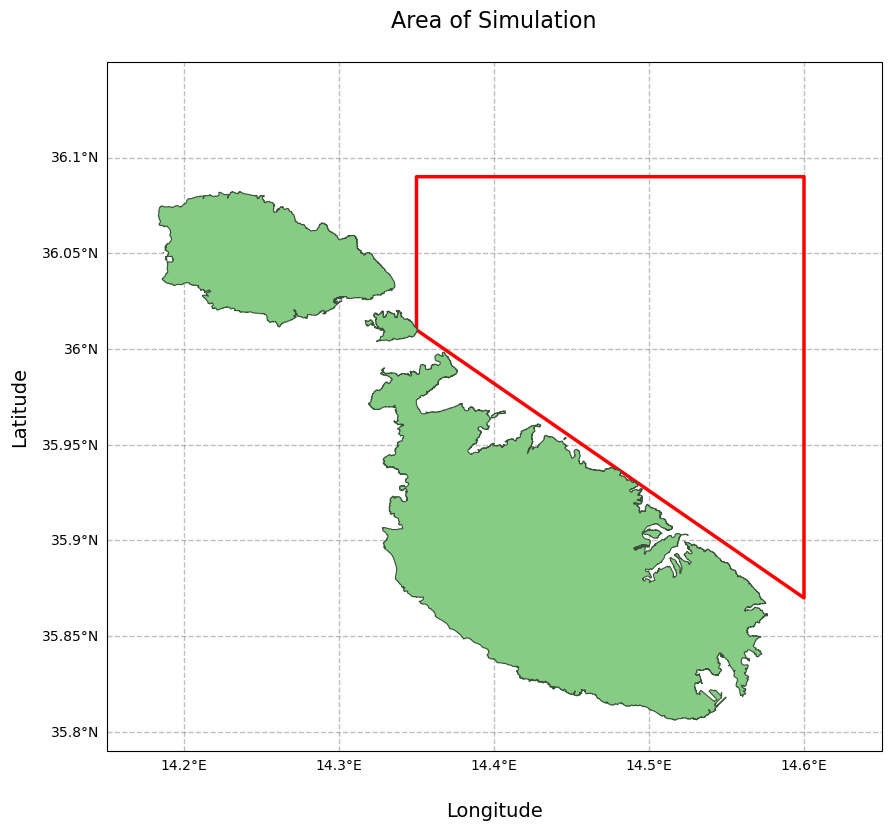

In [1]:
### First Visuslisation for the Article

import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Polygon

# Path to the shapefile
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Define the vertices of a polygon to highlight a specific area on the map
polygon_coordinates = [
    (14.6, 35.87),
    (14.35, 36.01),
    (14.35, 36.09),
    (14.6, 36.09),
    (14.6, 35.87)
]
polygon_shape = Polygon(polygon_coordinates)

# Define the geographic boundaries for plotting
extent = [14.15, 14.65, 35.79, 36.15]

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

# Add the polygon to the map
ax.add_geometries([polygon_shape], ccrs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=2.5, zorder=3)

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("Area of Simulation", pad=25, fontsize=16)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14)

# Specify the filename and dpi for saving the figure
plt.savefig('DingliMark_20703H_Image1.jpeg', dpi=300, bbox_inches='tight')
 
# Display the plot
plt.show()

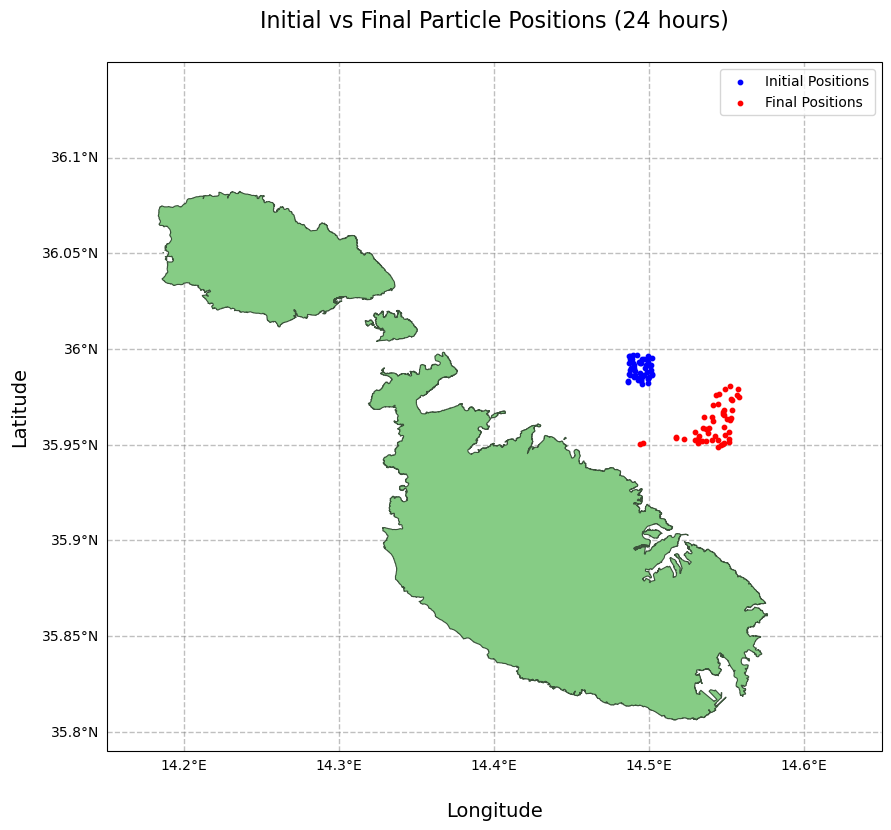

In [2]:
### Second Visuslisation for the Article

import xarray as xr

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Load the predicted particle data
predicted_ds = xr.open_zarr("../Lagrangian_Output/LSTM_predicted_values.zarr")

# Calculate initial and final positions
initial_lons = predicted_ds.lon.isel(obs=0).values  # Initial longitudes
initial_lats = predicted_ds.lat.isel(obs=0).values  # Initial latitudes
final_lons = predicted_ds.lon.isel(obs=-1).values  # Final longitudes
final_lats = predicted_ds.lat.isel(obs=-1).values  # Final latitudes

# Define the geographic boundaries for the plot
extent = [14.15, 14.65, 35.79, 36.15]

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

# Plot the initial positions of the particles on the map
ax.scatter(initial_lons, initial_lats, s=10, c='blue', marker='o', transform=ccrs.PlateCarree(), label='Initial Positions', zorder=3)

# Plot the final positions of the particles on the map
ax.scatter(final_lons, final_lats, s=10, c='red', marker='o', transform=ccrs.PlateCarree(), label='Final Positions', zorder=3)

# Customize the plot appearance
ax.set_title("Initial vs Final Particle Positions (24 hours)", pad=25, fontsize=16)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14)
ax.legend(loc='upper right')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Specify the filename and dpi for saving the figure
plt.savefig('DingliMark_20703H_Image2.jpeg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

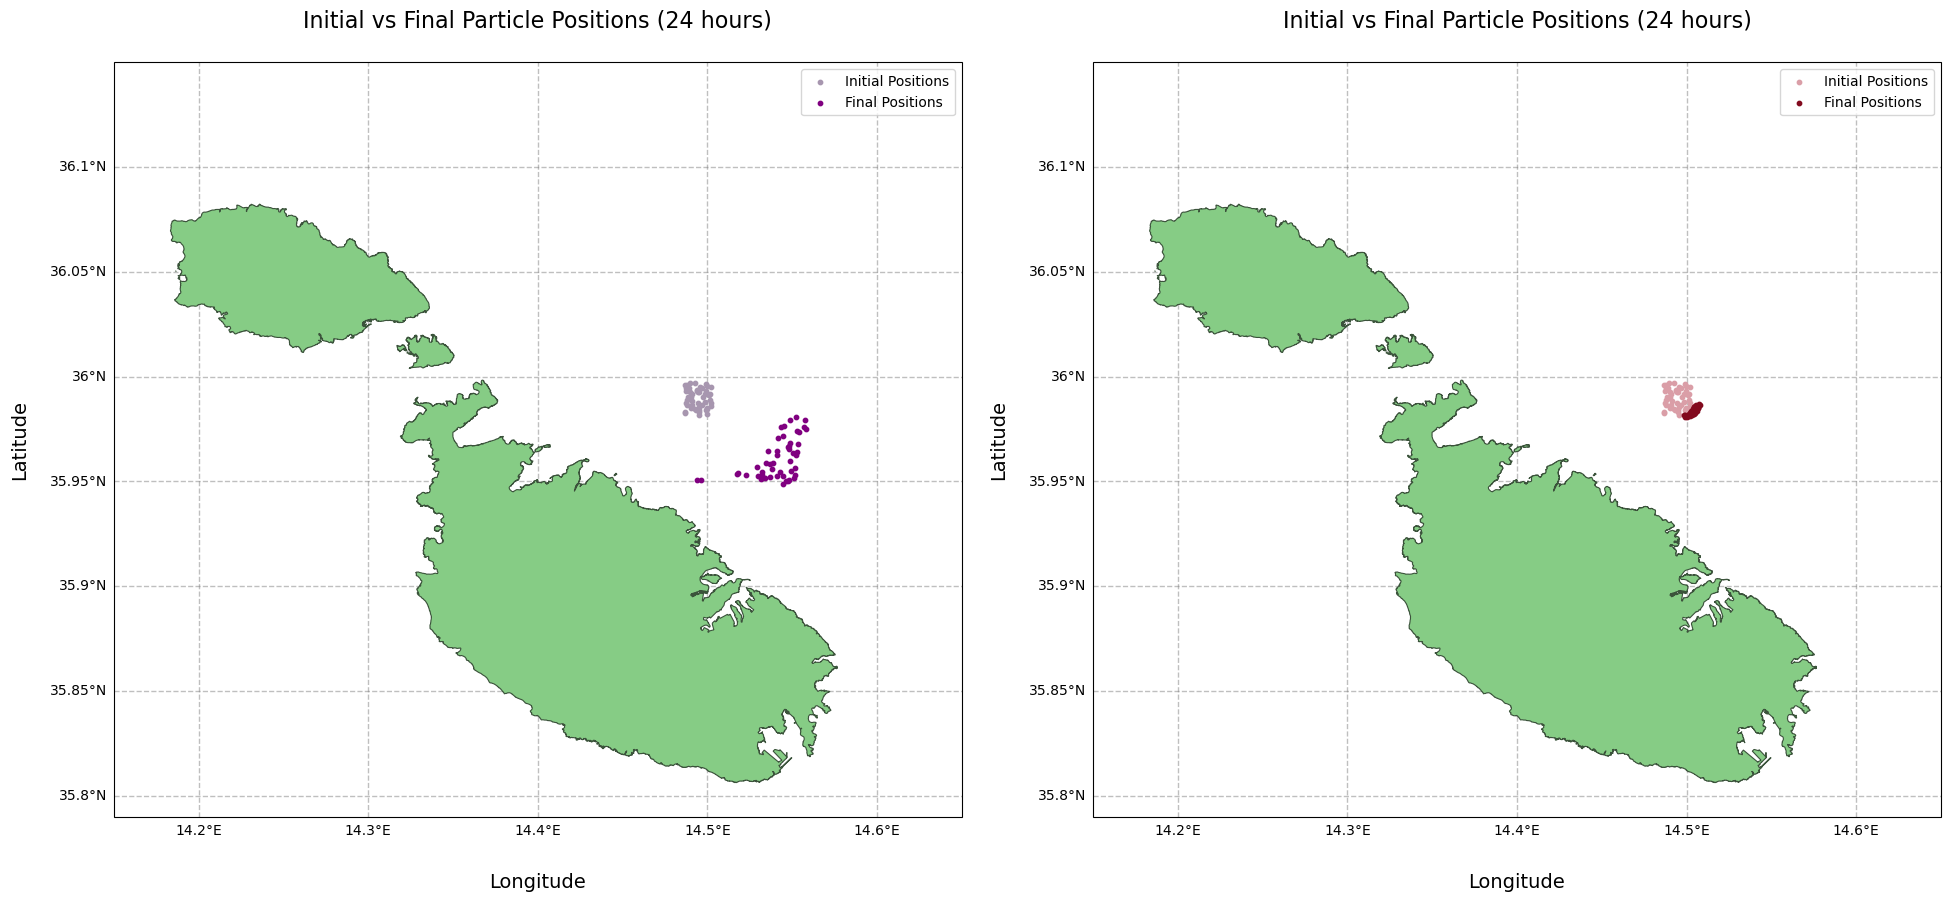

In [7]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load the shapefile using GeoPandas and ensure it's in WGS84 CRS
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Load the predicted particle data for LSTM and GRU
predicted_lstm = xr.open_zarr("../Lagrangian_Output/LSTM_predicted_values.zarr")
predicted_gru = xr.open_zarr("../Lagrangian_Output/GRU_predicted_values.zarr")

# Define the geographic boundaries for the plot
extent = [14.15, 14.65, 35.79, 36.15]

# Set up the figure and axes with a geographic (Plate Carree) projection
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.set_extent(extent)
ax2.set_extent(extent)

# Colors for initial and final markers
colors_lstm = {'initial': '#A796AF', 'final': 'purple'}
colors_gru = {'initial': '#DA9EA7', 'final': '#820A1E'}

# Plot function to avoid code duplication
def plot_positions(ax, data, title, colors):
    initial_lons = data.lon.isel(obs=0).values  # Initial longitudes
    initial_lats = data.lat.isel(obs=0).values  # Initial latitudes
    final_lons = data.lon.isel(obs=-1).values  # Final longitudes
    final_lats = data.lat.isel(obs=-1).values  # Final latitudes

    # Plot the coastline of Malta from the shapefile using GeoPandas
    gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

    # Plot the initial positions of the particles on the map
    ax.scatter(initial_lons, initial_lats, s=10, c=colors['initial'], marker='o', label='Initial Positions', transform=ccrs.PlateCarree(), zorder=3)

    # Plot the final positions of the particles on the map
    ax.scatter(final_lons, final_lats, s=10, c=colors['final'], marker='o', label='Final Positions', transform=ccrs.PlateCarree(), zorder=3)

    # Customize the plot appearance
    ax.set_title(title, pad=25, fontsize=16)
    ax.legend(loc='upper right')

    # Add gridlines and labels to improve map readability
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    # Customize the plot appearance
    ax.set_title("Initial vs Final Particle Positions (24 hours)", pad=25, fontsize=16)
    ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=14)
    ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=14)

# Plot LSTM and GRU predictions
plot_positions(ax1, predicted_lstm, "LSTM: Initial vs Final Particle Positions (24 hours)", colors_lstm)
plot_positions(ax2, predicted_gru, "GRU: Initial vs Final Particle Positions (24 hours)", colors_gru)

# Customize layout
plt.tight_layout(pad=3)

# Specify the filename and dpi for saving the figure
plt.savefig('Comparison_LSTM_GRU.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

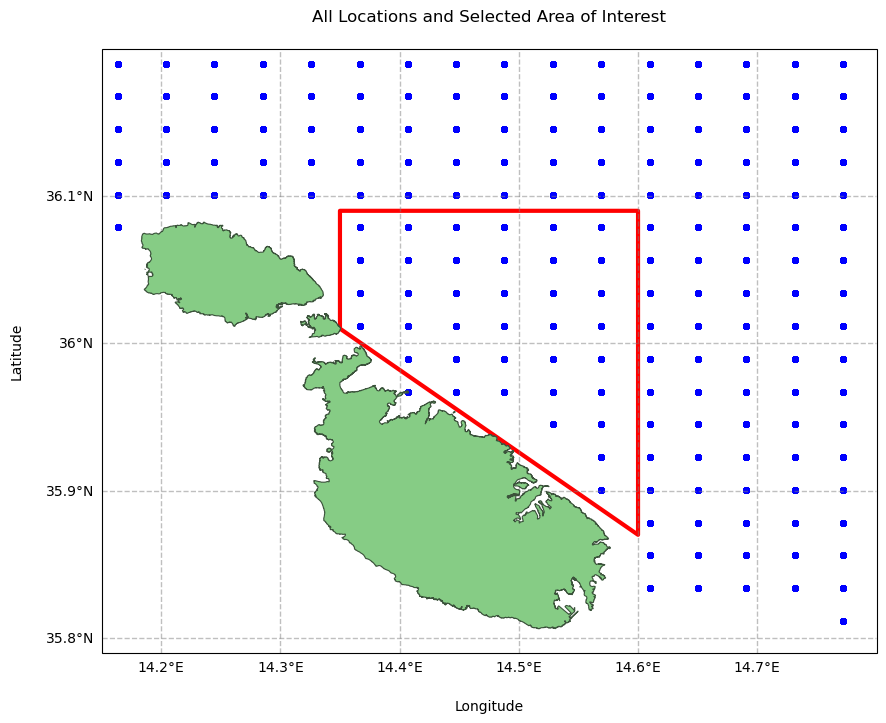

In [3]:
import pandas as pd

# Load the dataset
netcdf_file_path = "../Data/model_IO/final_SSC_Data.nc"

# Open the dataset
dataset = xr.open_dataset(netcdf_file_path)

# Convert the dataset to a pandas DataFrame and reset the index
df = dataset.to_dataframe().reset_index()

# Drop unnecessary columns from the DataFrame
df = df.drop(columns=['stdu', 'stdv', 'cov', 'velo', 'head'])

# Drop rows with NaN values in 'u' and 'v' columns
df.dropna(subset=['u', 'v'], inplace=True)

# Convert the 'time' column to datetime format
df.index = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M:%S')

# Define the boundaries for the map
boundaries = {
    'min_lon': 14.15,
    'max_lon': 14.8,
    'min_lat': 35.79,
    'max_lat': 36.2
}

# Define the vertices of a polygon to highlight a specific area on the map
polygon_coordinates = [
    (14.6, 35.87),
    (14.35, 36.01),
    (14.35, 36.09),
    (14.6, 36.09),
    (14.6, 35.87)
]

# Load the shapefile using GeoPandas
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([boundaries['min_lon'], boundaries['max_lon'], boundaries['min_lat'], boundaries['max_lat']])

# Plot the coastline of Malta using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Plot all data points within the defined geographic boundaries
ax.scatter(df['lon'], df['lat'], s=12, color='blue', marker='o', alpha=0.5, transform=ccrs.Geodetic())

# Create and add the polygon to the map
polygon_shape = Polygon(polygon_coordinates)
ax.add_geometries([polygon_shape], ccrs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=3)

# Customize the plot appearance
ax.set_title("All Locations and Selected Area of Interest", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

# Add gridlines to the map
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

c:\Users\markd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


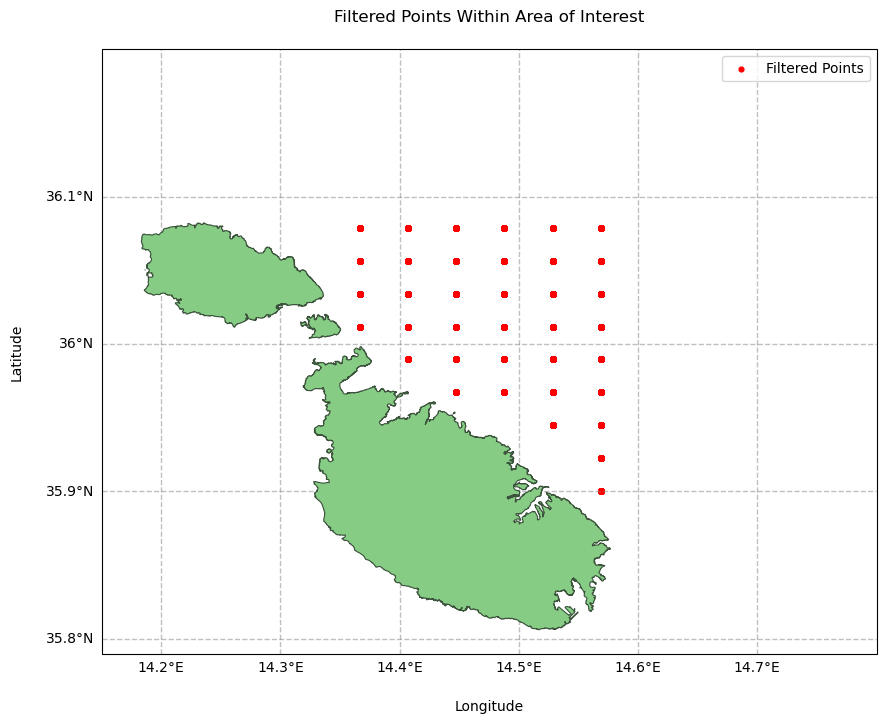

In [5]:
# Convert your polygon into a GeoDataFrame
polygon_gdf = gpd.GeoDataFrame(index=[0], geometry=[polygon_shape], crs="EPSG:4326")

# Convert the DataFrame to a GeoDataFrame
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

# Use spatial join to find points within the polygon
df_inside_polygon = gpd.sjoin(gdf_points, polygon_gdf, how="inner", op='within')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([boundaries['min_lon'], boundaries['max_lon'], boundaries['min_lat'], boundaries['max_lat']])

# Plot the coastline of Malta from the shapefile using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Plot the points that are located within the defined polygon in red
df_inside_polygon.plot(ax=ax, color='red', markersize=12, label='Filtered Points', transform=ccrs.Geodetic())

# Customize the plot appearance
ax.set_title("Filtered Points Within Area of Interest", pad=20)
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines to the map
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


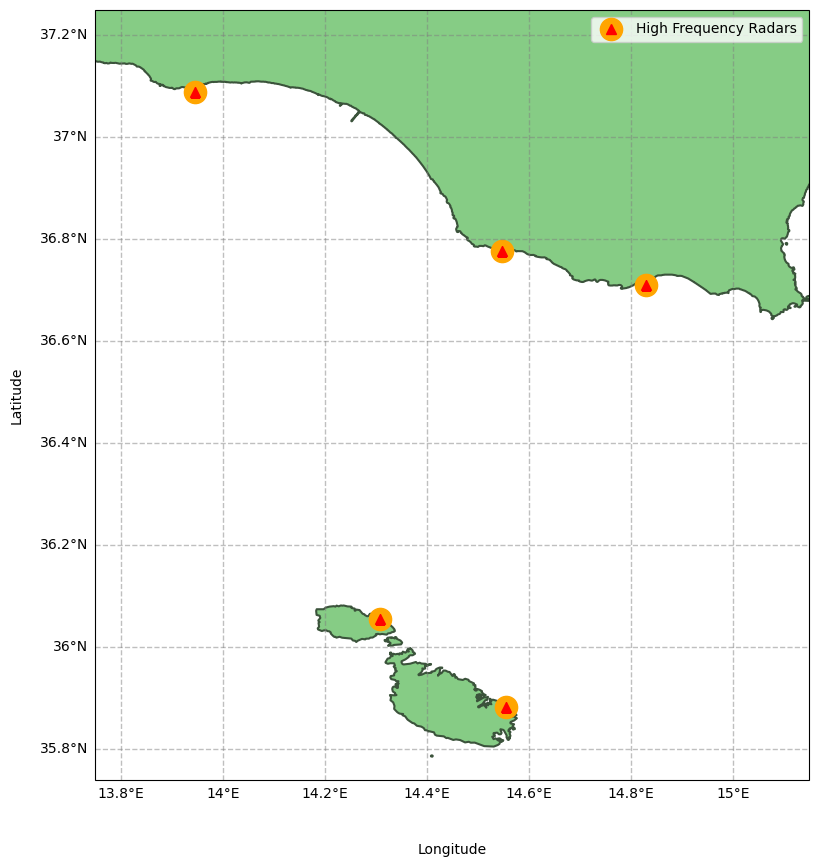

In [79]:
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from matplotlib.lines import Line2D  
from matplotlib.legend_handler import HandlerTuple

# Define the path to your shapefile.
shapefile_path = "../Data/land_sea_mask/sicily/iho.shp"

# Set the extent of your map (longitude and latitude boundaries).
extent = [13.75, 15.15, 35.74, 37.25]

# Create a figure object and set the size.
fig = plt.figure(figsize=(14, 10))

# Create a GeoAxes object with the Plate Carree projection.
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent using the predefined bounding box.
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Set the background color of the axes to green (representing land).
ax.set_facecolor('#86CC85')

# Read the shapefile using the Reader and create a ShapelyFeature.
shape_feature = ShapelyFeature(Reader(shapefile_path).geometries(),
                               ccrs.PlateCarree(), edgecolor='#3B533B', facecolor='white', linewidth=1.5)

# Add the shapefile feature to the axes.
ax.add_feature(shape_feature)

# Customize the plot appearance
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
ax.legend(loc='upper right')

# Add gridlines to the map
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Radar points to be added to the map, defined as (Longitude, Latitude).
radar_points = [
    (13.9456, 37.0894),
    (14.5483, 36.7778),
    (14.8300, 36.7106),
    (14.3083, 36.0564),
    (14.5561, 35.8825),
]

radar_plots = []
for lon, lat in radar_points:
    # First, plot the aura using a larger, semi-transparent marker
    ax.plot(lon, lat, marker='o', color='orange', markersize=16, alpha=1, transform=ccrs.Geodetic())
    
    # Then, plot the radar point on top with a smaller, opaque marker
    point, = ax.plot(lon, lat, marker='^', color='red', markersize=7, alpha=1, transform=ccrs.Geodetic(), label="High Frequency Radars")
    radar_plots.append(point)

# Define the custom handler
class CustomHandler(HandlerTuple):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        # Create the aura circle
        aura = Line2D([x0 + width / 2.], [y0 + height / 2.], marker='o', color='orange', 
                      markerfacecolor='orange', markersize=16, alpha=1)
        # Create the radar triangle
        triangle = Line2D([x0 + width / 2.], [y0 + height / 2.], marker='^', color='red', 
                          markerfacecolor='red', markersize=7, alpha=1)
        return [aura, triangle]

# Create the custom legend elements as a tuple
legend_elements = (Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=16, alpha=1),
                   Line2D([0], [0], marker='^', color='w', markerfacecolor='red', markersize=7, alpha=1))

# Add the legend to the plot with the custom handler
ax.legend([legend_elements], ['High Frequency Radars'], handler_map={legend_elements: CustomHandler()}, loc='upper right')

# Save the figure as a PNG file
plt.savefig('radar_locations.png', bbox_inches='tight', dpi=300)

# Display the plot.
plt.show()

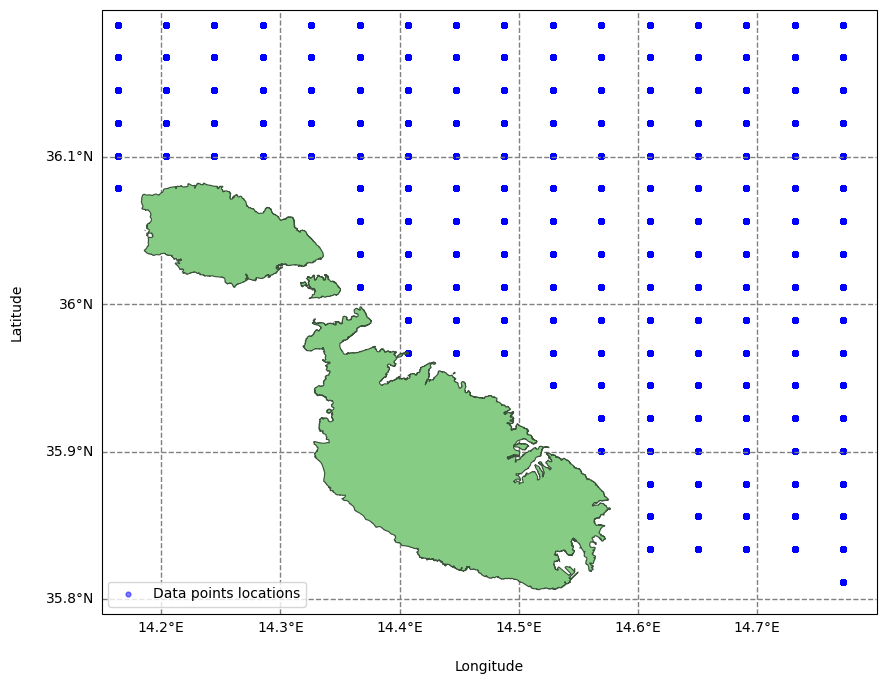

In [6]:
import pandas as pd

# Load the dataset
netcdf_file_path = "../Data/model_IO/final_SSC_Data.nc"

# Open the dataset
dataset = xr.open_dataset(netcdf_file_path)

# Convert the dataset to a pandas DataFrame and reset the index
df = dataset.to_dataframe().reset_index()

# Drop unnecessary columns from the DataFrame
df = df.drop(columns=['stdu', 'stdv', 'cov', 'velo', 'head'])

# Drop rows with NaN values in 'u' and 'v' columns
df.dropna(subset=['u', 'v'], inplace=True)

# Convert the 'time' column to datetime format
df.index = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M:%S')

# Define the boundaries for the map
boundaries = {
    'min_lon': 14.15,
    'max_lon': 14.8,
    'min_lat': 35.79,
    'max_lat': 36.2
}

# Define the vertices of a polygon to highlight a specific area on the map
polygon_coordinates = [
    (14.6, 35.87),
    (14.35, 36.01),
    (14.35, 36.09),
    (14.6, 36.09),
    (14.6, 35.87)
]

# Load the shapefile using GeoPandas
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
gdf = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare the plot with a geographic (Plate Carree) projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([boundaries['min_lon'], boundaries['max_lon'], boundaries['min_lat'], boundaries['max_lat']])

# Plot the coastline of Malta using GeoPandas
gdf.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=3)

# Plot all data points within the defined geographic boundaries
ax.scatter(df['lon'], df['lat'], s=12, color='blue', marker='o', alpha=0.5, transform=ccrs.Geodetic())

# Added label for the legend
ax.scatter(df['lon'], df['lat'], s=12, color='blue', marker='o', alpha=0.5, transform=ccrs.Geodetic(), label='Data points locations')

# Customize the plot appearance
ax.text(-0.1, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)

# Add gridlines to the map
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=1, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.legend(loc='lower left')

plt.savefig('data_locations.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()